# 辨識服裝

In [2]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape
#Each Label is between 0-9

train_labels
test_images.shape

(10000, 28, 28)

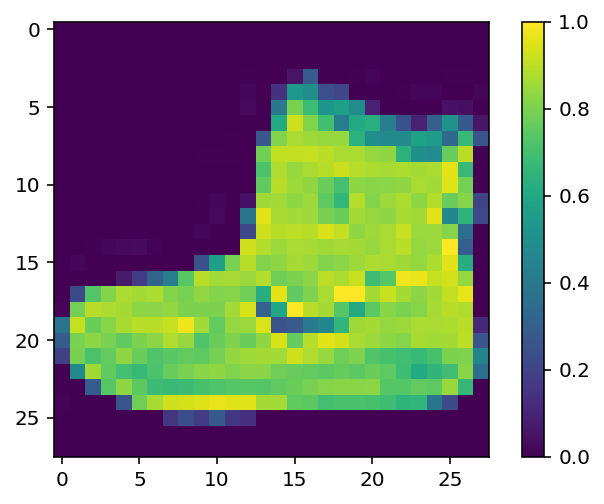

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

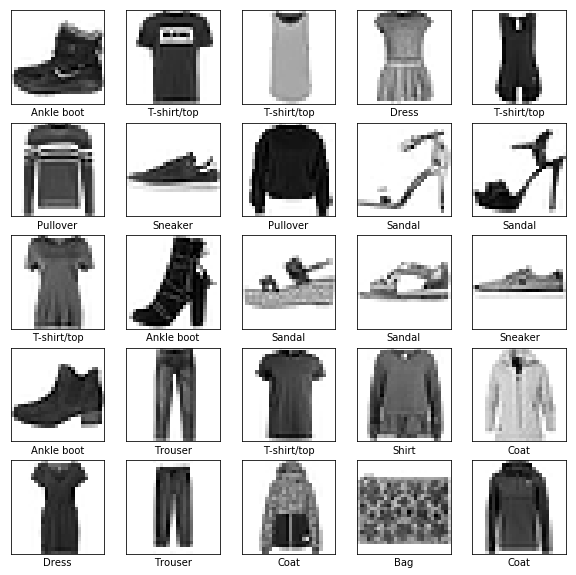

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4981 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3759 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3374 - acc: 0.8765
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3132 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2958 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2818 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2690 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2582 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2492 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 5s 76us/sample - loss: 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3403 - acc: 0.8789
Test accuracy: 0.8789


In [16]:
predictions = model.predict(test_images)

predictions[0]

array([3.5069098e-07, 4.2308059e-09, 8.0735340e-08, 2.1354515e-10,
       1.0590415e-08, 3.2630472e-03, 2.9779736e-07, 8.8547869e-03,
       8.1415905e-08, 9.8788130e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

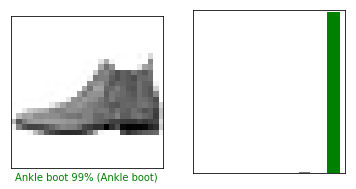

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

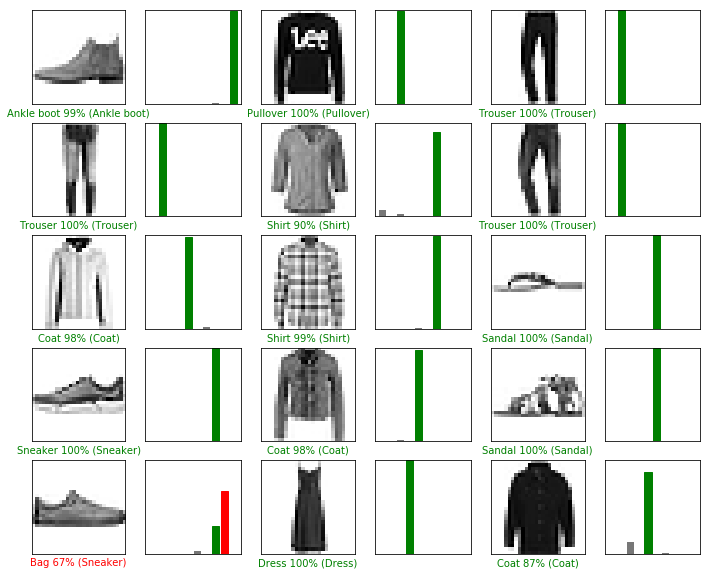

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img) 
print(predictions_single)



(28, 28)
(1, 28, 28)
[[3.5069132e-07 4.2308219e-09 8.0735497e-08 2.1354556e-10 1.0590496e-08
  3.2630502e-03 2.9779821e-07 8.8548036e-03 8.1416061e-08 9.8788130e-01]]


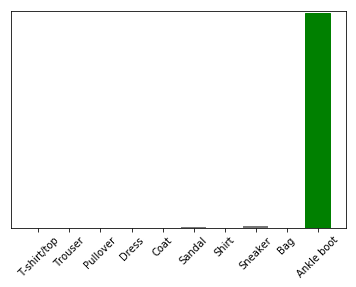

In [22]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [48]:
prediction_result = np.argmax(predictions_single[0])

In [49]:
print(prediction_result)

9
